In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
#plt.style.use('ggplot')
#from matplotlib.pyplot import figure

In [2]:
#metric="accuracy"
#metric="f1_score"
#metric="recall"
metric="precision"
meta = pd.read_csv("merged_meta_"+metric+".csv")

In [3]:
#X = pd.DataFrame(columns=meta.columns)
X=meta

In [4]:
X.columns

Index(['dataset', 'classifier', 'score', 'nr_classes', 'nr_instances',
       'log_nr_instances', 'nr_features', 'log_nr_features', 'missing_val',
       'nr_categorical_features', 'dataset_ratio', 'labels_mean', 'labels_std',
       'skew_min', 'skew_std', 'skew_mean', 'skew_q1', 'skew_q3', 'skew_max',
       'kurtosis_min', 'kurtosis_std', 'kurtosis_mean', 'kurtosis_q1',
       'kurtosis_q3', 'kurtosis_max', 'rho_min', 'rho_max', 'rho_mean',
       'rho_std', 'class_entropy', 'prob_min', 'prob_mean', 'prob_std',
       'prob_max', 'norm_entropy_min', 'norm_entropy_mean', 'norm_entropy_std',
       'norm_entropy_max', 'mi_min', 'mi_mean', 'mi_std', 'mi_max',
       'equiv_nr_feat', 'noise_signal_ratio'],
      dtype='object')

In [5]:
#meta.loc[meta[meta["Dataset"]==meta["Dataset"].unique()[0]]['Test accuracy'].idxmax()]

In [6]:
y=X.loc[:,"classifier"]
classes=X.loc[:,"classifier"].unique()
y=np.array([np.where(classes==row)[0][0] for row in X.loc[:,"classifier"] ])
X=X.iloc[:,3:]


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
Xs=scaler.transform(X)

In [8]:
#ignore
Xs=X.to_numpy()

In [9]:
from joblib import dump, load
dump(scaler, 'scaler.joblib') 

['scaler.joblib']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7cb92f3c8>,
      dtype=object)

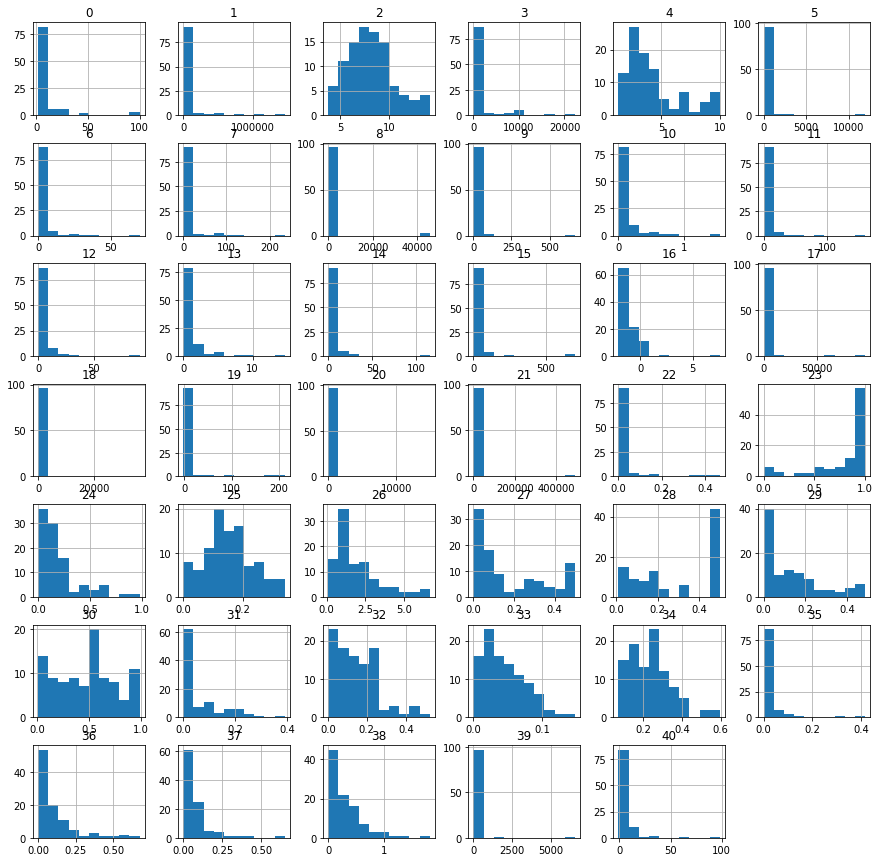

In [64]:
pd.DataFrame.hist(pd.DataFrame(Xs), figsize = [15,15])

(array([29.,  2., 24., 11., 16.,  3.,  4.,  2.,  4.,  4.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

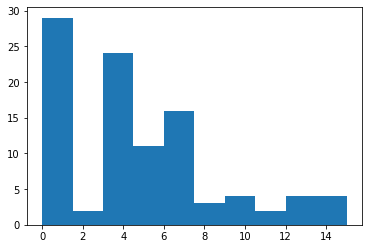

In [11]:
plt.hist(y)

In [12]:
Xs[:,-2]

array([3.22531150e+01, 4.21890825e+01, 9.65892450e+00, 1.45216530e+03,
       4.01087420e+02, 1.08540543e+02, 1.38697433e+01, 1.78370480e+01,
       2.24511682e+01, 1.47525590e+01, 1.03770893e+01, 4.77008651e+01,
       6.33935413e+01, 4.56238942e+01, 5.90011709e+01, 2.96967690e+02,
       1.06134556e+02, 1.86517648e+01, 4.20234132e+00, 1.81787090e+01,
       3.71283173e+02, 5.82725721e+01, 2.67162122e+01, 3.44451390e+01,
       1.57597427e+01, 1.66935447e+02, 5.41694789e+00, 6.00356201e+00,
       1.98896583e+01, 2.62406020e+01, 6.11373452e+01, 1.09208328e+01,
       7.21354006e+00, 1.91947882e+01, 2.33821172e+00, 3.26713610e+01,
       2.30725018e+01, 2.29680477e+02, 3.73546092e+01, 1.65843777e+02,
       1.07082404e+02, 2.44158485e+02, 3.33511805e+02, 1.25064681e+02,
       1.51327366e+01, 4.74243160e+01, 1.06367481e+01, 7.56227205e+00,
       1.68050206e+01, 5.00639203e+01, 2.62717745e+00, 1.87702641e+01,
       4.29662066e+01, 2.66556126e+01, 1.41702422e+01, 1.18426131e+01,
      

In [51]:
sp=20
np.random.seed()
indices = np.random.permutation(len(X))
X_train = Xs[indices[:-sp]]
y_train = y[indices[:-sp]]
X_test = Xs[indices[-sp:]]
y_test = y[indices[-sp:]]

In [52]:
X_train.shape

(79, 41)

In [53]:
X_test.shape

(20, 41)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,p=2,leaf_size=30)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train),knn.score(X_test,y_test))

0.4430379746835443 0.15


In [61]:
#knn.fit(Xs,y)
#knn.score(Xs,y)

In [62]:
#from joblib import dump, load
#dump(knn, 'knn.joblib') 

In [63]:
from sklearn.ensemble import RandomForestClassifier
fr=RandomForestClassifier()
fr.fit(X_train,y_train)
print(fr.score(X_train,y_train),fr.score(X_test,y_test))
#fr.fit(X,y)
#print(fr.score(X,y))

0.9873417721518988 0.25


In [20]:
#from sklearn.svm import SVC
#clf = SVC(gamma='auto', kernel="linear")
#clf.fit(X_train, y_train) 
#print(clf.score(X_train,y_train),clf.score(X_test,y_test))

In [21]:
from joblib import dump, load
dump(fr, 'fr_'+metric+'.joblib') 

['fr_precision.joblib']